# Parkinson's Electrophysiological Signal Dataset (PESD) exploration notebook

**DISCLAIMER:** This notebook was AI-generated with _dandi-notebook-gen_ and has not undergone full manual verification. Use with caution and verify analyses independently.

This notebook provides a guided exploration of Dandiset **001333** (_PESD_), which contains electrophysiological recordings focused on Parkinson's disease modeling.

## Dataset overview
- **Title:** Parkinson's Electrophysiological Signal Dataset (PESD)
- **ID:** DANDI:001333/draft
- **Description:** Contains LFP signals and beta-band features synthesized from both healthy and parkinsonian simulations, focusing on STN activity.
- **Keywords:** ecephys, LFP, Parkinson's Disease, Beta Band
- **Contributors:** Biswas, Ananna
- **Techniques:** extracellular recording, filtering, computational modeling
- **License:** CC-BY-4.0
- **More info:** [arXiv:2407.17756](https://arxiv.org/abs/2407.17756)

---

The dataset contains more than 1000 NWB files simulating multiple sessions from healthy and Parkinsonian conditions.
Each NWB file contains:
- Beta band average rectified voltage (ARV)
- Local Field Potentials (LFP) from the Subthalamic Nucleus (STN)
- Extensive metadata for electrodes, devices, subject info

## Setup: Load all file assets using the DANDI API
**Note:** This step lists all available assets in Dandiset 001333.

In [1]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001333", "draft")
assets = list(dandiset.get_assets())
print(f"Total number of assets: {len(assets)}")
for asset in assets[:5]:  # preview a sample of assets
    print(asset.path)

Total number of assets: 1305
sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb
sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-1251_ecephys.nwb
sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-1259_ecephys.nwb
sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-1070_ecephys.nwb
sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-1044_ecephys.nwb


---
## Accessing a specific NWB file
We'll now demonstrate accessing a single NWB file from this dataset.

In [2]:
import remfile
import h5py
import pynwb

# The URL for a specific example NWB file in the dandiset assets
nwb_url = "https://api.dandiarchive.org/api/assets/1d94c7ad-dbaf-43ea-89f2-1b2518fab158/download/"
file = remfile.File(nwb_url)
f = h5py.File(file, 'r')
io = pynwb.NWBHDF5IO(file=f, load_namespaces=True)
nwbfile = io.read()

print(f"Session description: {nwbfile.session_description}")
print(f"Session start time: {nwbfile.session_start_time}")
print(f"Subject ID: {nwbfile.subject.subject_id}")
print(f"Subject species: {nwbfile.subject.species}")
print("Available processing modules:", list(nwbfile.processing.keys()))

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Session start time: 2025-04-03 12:30:26.094607-04:00
Subject ID: healthy-simulated-beta
Subject species: Homo sapiens
Available processing modules: ['ecephys']


## Examining LFP data structure
We'll explore the `ecephys` processing module which contains the LFP data filtered in the beta band.

In [3]:
lfp_es = nwbfile.processing["ecephys"].data_interfaces["LFP"].electrical_series["Beta_Band_Voltage"]
print("Beta band electrical series:")
print(f"  Shape: {lfp_es.data.shape}")
print(f"  Unit: {lfp_es.unit}")
print(f"  Description: {lfp_es.description}")

print("Electrode metadata fields:", lfp_es.electrodes.table.colnames)

Beta band electrical series:
  Shape: (1400,)
  Unit: volts
  Description: no description
Electrode metadata fields: ('location', 'group', 'group_name', 'label')


## Plotting beta-band LFP trace
Here's a visualization of the beta-band filtered LFP voltage trace corresponding to this session. This aids inspection of ongoing oscillatory beta activity characteristic of parkinsonian models.

**Note:** For performance, this loads the entire vector, which is modest (~1400 points). For larger datasets, consider chunked or subset loading.

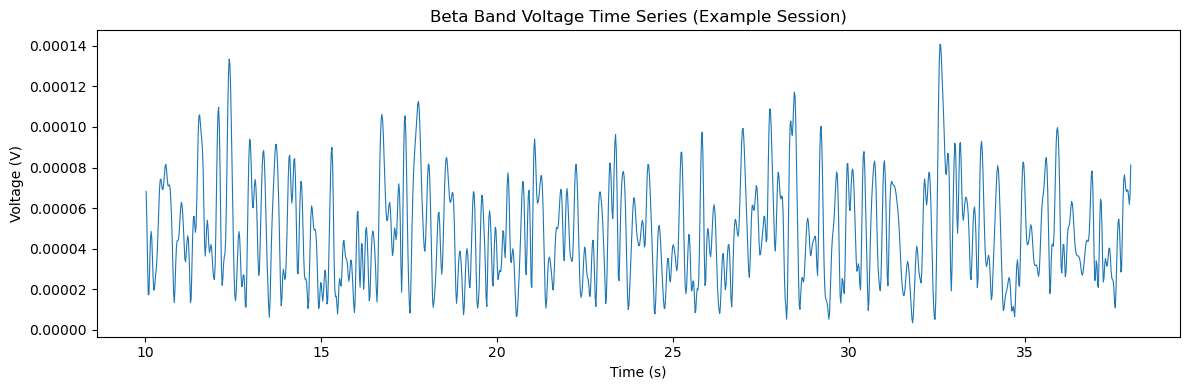

In [4]:
import matplotlib.pyplot as plt

data = lfp_es.data[:]
timestamps = lfp_es.timestamps[:]

plt.figure(figsize=(12, 4))
plt.plot(timestamps, data, lw=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Beta Band Voltage Time Series (Example Session)')
plt.tight_layout()
plt.show()

The figure above demonstrates the fluctuations in beta-band activity. Future analyses might explore spectral power, phase-amplitude coupling, or comparison across conditions.

## Example: Compute mean and standard deviation of beta-band activity

In [5]:
import numpy as np

mean_val = np.mean(data)
std_val = np.std(data)
print(f"Mean beta-band voltage: {mean_val:.6f} V")
print(f"Standard deviation: {std_val:.6f} V")

Mean beta-band voltage: 0.000048 V
Standard deviation: 0.000025 V


## Next steps for practitioners
- Explore other sessions/assets in the dataset
- Compute spectral properties (e.g., via Welch method)
- Correlate beta power with behavioral or clinical covariates if available
- NOTE: Large computations or multi-session analyses will require optimized data loading, chunking, or downloading locally first.

## Final remarks
This minimal notebook offers a starting point to navigate Dandiset 001333, extract LFP and beta-band data, and generate quality visualizations. It uses just one example file, but all tools scale to the broader dataset.

Remember, this notebook was generated automatically and **requires further validation by domain experts**.